<a href="https://colab.research.google.com/github/suneethach/Diabetes_knn_ML/blob/main/Diabetes_prediction_by_using_knn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction by using knn Machine Learning Classifier:
***

In [ ]:
from google.colab import drive
try:
  drive.mount("/content/drive")
except:
  raise KeyboardInterrupt


Mounted at /content/drive


In [28]:
import pandas as pd

In [29]:
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# New Section

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
diab_t_cnt=len(df.loc[df["Outcome"]==1])
diab_f_cnt=len(df.loc[df["Outcome"]==0])

In [33]:
(diab_t_cnt,diab_f_cnt)


(268, 500)

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.info() # to get whole info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.corr().T  # to get correlation between features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [44]:
# Select dependent independent variables
x= df[["Glucose"]]
y=df[["Outcome"]]

## ***#Divide*** ***dataset*** ***into*** ***train*** ***and*** ***test*** ***dataset***

In [45]:
# Import train, test, split from sklearn library
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)


In [46]:
# train and test dataset
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [47]:
x_train.shape

(537, 1)

In [48]:
y_train.shape

(537, 1)

In [49]:
y_train

,Outcome
419,1
681,1
385,0
411,0
353,0
...,...
220,1
254,1
680,0
279,0


In [51]:
# Fit the classifier to the data
knn.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Testing the model
Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. 
As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient 
does have diabetes. To save space, we will only show print the first 5 predictions of our test set.


In [53]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)


0.696969696969697

In [ ]:
k-Fold Cross-Validation
Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set 
and the rest are used as the training set. The model is trained on the training set and scored on the test set. 
Then the process is repeated until each unique group as been used as the test set.


In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)


In [56]:
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [58]:
#print each cv score (accuracy) and average them
print(cv_scores)


[0.68181818 0.7012987  0.72077922 0.7254902  0.70588235]


In [65]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7070537305831424


In [ ]:
Using cross-validation, our mean score is about 70.70%. This is a more accurate representation of how our model will perform
on unseen data than our earlier testing using the holdout method.
Hypertuning model parameters using GridSearchCV
When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that 
choice.
Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. 
In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, 
we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. 
To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 

Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to 
find the optimal value for ‘n_neighbors’.


In [66]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()


In [68]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}


In [69]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)


In [70]:
#fit model to data
knn_gscv.fit(x, y,)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
#check top performing n_neighbors value
knn_gscv.best_params_

optimal value for ‘n_neighbors’. We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 22. 
‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

{'n_neighbors': 22}

In [72]:
#check mean score for the top performing value of n_neighbors: By using grid search to find the optimal parameter for our model,
we have improved our model accuracy.
knn_gscv.best_score_


0.7357439945675239

In [ ]:
# Fit the data
clf.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=51, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Pridict Data
y_Pridict=clf.predict(x_test)

**#Check accuracy score as well as confusion matrix**

In [ ]:
# Check accuracy score using sklearn library
!pip install sklearn




In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

print(accuracy_score(y_train,y_Pridict))

0.7318435754189944


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_Pridict,y_test))

[[142  40]
 [ 11  38]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

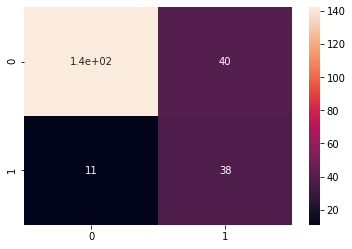

In [ ]:
sns.heatmap(confusion_matrix(y_Pridict,y_test),annot=True)

In [ ]:
y_Pridict.shape

(537,)

In [ ]:
a=clf.predict(([[11]]))

In [ ]:
# Check classification report
from sklearn.metrics import classification_report
print(classification_report,(y_test,y_Pridict))

<function classification_report at 0x7ffaaaa0a620> (     Outcome
319        1
227        1
628        0
381        0
409        1
..       ...
682        0
532        0
686        0
714        0
757        1

[231 rows x 1 columns], array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
if a==0:
  print("You are Diabetic free")
else:
  print("You have diabetese, concern doctor")

You are Diabetic free
